In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.modeling.models import BlackBody
from scipy.interpolate import interp1d

In [2]:
def donut_array_ellipse(a1, b1, ecc, inc, width, height):
    array = np.zeros((height, width), dtype=np.float32)
    
    x0 = width // 2
    y0 = height // 2
    
    # Outer ellipse
    inc_rad = np.radians(inc)
    cos_inc = np.cos(inc_rad)
    sin_inc = np.sin(inc_rad)
    
    for y in range(height):
        for x in range(width):
            norm_x = (x - x0) / a1
            norm_y = (y - y0) / b1
            transformed_x = norm_x * cos_inc - norm_y * sin_inc
            transformed_y = norm_x * sin_inc + norm_y * cos_inc
            if transformed_x**2 / (1 -ecc**2) + transformed_y**2 <= 1:
                array[y, x] = 1
    
    ratio = b1 / a1
    a2 = a1 * ratio
    b2 = b1 * ratio
       
    for y in range(height):
        for x in range(width):
            norm_x = (x - x0) / a2
            norm_y = (y - y0) / b2
            transformed_x = norm_x * cos_inc - norm_y * sin_inc
            transformed_y = norm_x * sin_inc + norm_y * cos_inc
            if transformed_x**2 / (1 -ecc**2) + transformed_y**2 <= 1:
                array[y, x] = 0
    
    return array

In [3]:
draw_donut_ellipse = donut_array_ellipse(800, 500, 0.8, 30, 2000, 2000)

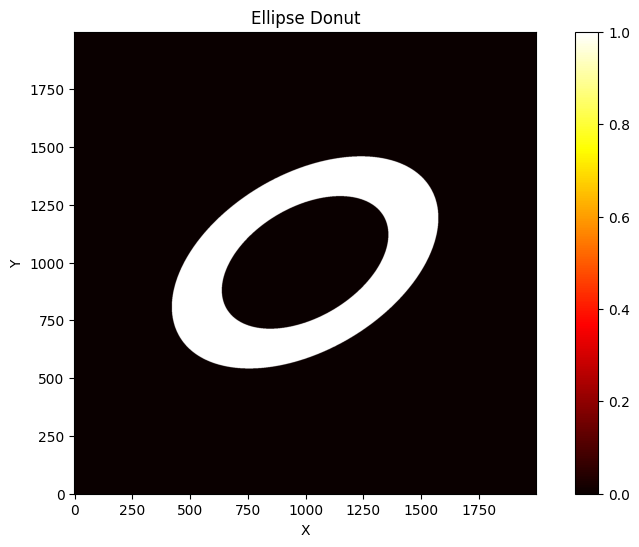

In [4]:
plt.figure(figsize=(10, 6))
plt.imshow(draw_donut_ellipse, cmap='hot', origin='lower')
plt.title('Ellipse Donut')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [5]:
def donut_array_ellipse_flux(a1, b1, ecc, inc, width, height):
    array = np.zeros((height, width), dtype=np.float32)
    
    x0 = width // 2
    y0 = height // 2
    
    # Outer ellipse
    inc_rad = np.radians(inc)
    cos_inc = np.cos(inc_rad)
    sin_inc = np.sin(inc_rad)
    
    for y in range(height):
        for x in range(width):
            norm_x = (x - x0) / a1
            norm_y = (y - y0) / b1
            transformed_x = norm_x * cos_inc - norm_y * sin_inc
            transformed_y = norm_x * sin_inc + norm_y * cos_inc
            if transformed_x**2 / (1 -ecc**2) + transformed_y**2 <= 1:
                
                dist = np.sqrt((x - x0)**2+ (y - y0)**2)
                
                intensity = 50 + 200 * np.exp(-dist**2 / (2 * (0.1 * width)**2))
                
                array[y, x] = intensity
    
    ratio = b1 / a1
    a2 = a1 * ratio
    b2 = b1 * ratio
       
    for y in range(height):
        for x in range(width):
            norm_x = (x - x0) / a2
            norm_y = (y - y0) / b2
            transformed_x = norm_x * cos_inc - norm_y * sin_inc
            transformed_y = norm_x * sin_inc + norm_y * cos_inc
            if transformed_x**2 / (1 -ecc**2) + transformed_y**2 <= 1:
                array[y, x] = 0
    
    return array

In [6]:
draw_donut_ellipse_flux = donut_array_ellipse_flux(800, 500, 0.8, 30, 2000, 2000)

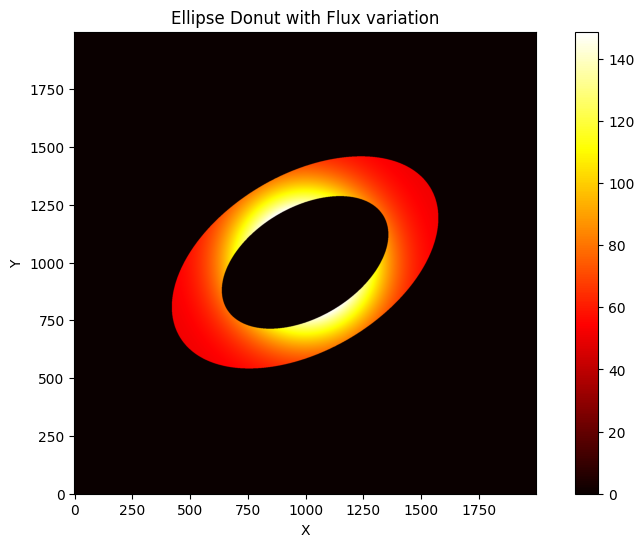

In [7]:
plt.figure(figsize=(10, 6))
plt.imshow(draw_donut_ellipse_flux, cmap='hot', origin='lower')
plt.title('Ellipse Donut with Flux variation')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [8]:
def donut_array_ellipse_bb(a1, b1, ecc, inc, temp_disk, width, height):
    array = np.zeros((height, width), dtype=np.float32)
    
    x0 = width // 2
    y0 = height // 2
    
    # Outer ellipse
    inc_rad = np.radians(inc)
    cos_inc = np.cos(inc_rad)
    sin_inc = np.sin(inc_rad)
    
    temp_disk = temp_disk * u.K
    wav = np.linspace(1e-6, 100e-6, 1000) * u.meter
    bb_disk = BlackBody(temperature=temp_disk)
    fd_disk = bb_disk(wav)
    interp_fd_disk = interp1d(np.arange(len(fd_disk)), fd_disk)(np.linspace(0, len(fd_disk) - 1, num=array.shape[0]))
    
    for y in range(height):
        for x in range(width):
            norm_x = (x - x0) / a1
            norm_y = (y - y0) / b1
            transformed_x = norm_x * cos_inc - norm_y * sin_inc
            transformed_y = norm_x * sin_inc + norm_y * cos_inc
            if transformed_x**2 / (1 -ecc**2) + transformed_y**2 <= 1:
                
                dist = np.sqrt((x - x0)**2+ (y - y0)**2)
                
                intensity = 50 + 200 * np.exp(-dist**2 / (2 * (0.1 * width)**2))
                
                array[y, x] = intensity + interp_fd_disk[y]
    
    ratio = b1 / a1
    a2 = a1 * ratio
    b2 = b1 * ratio
       
    for y in range(height):
        for x in range(width):
            norm_x = (x - x0) / a2
            norm_y = (y - y0) / b2
            transformed_x = norm_x * cos_inc - norm_y * sin_inc
            transformed_y = norm_x * sin_inc + norm_y * cos_inc
            if transformed_x**2 / (1 -ecc**2) + transformed_y**2 <= 1:
                array[y, x] = 0
    
    return array

In [9]:
draw_donut_ellipse_bb = donut_array_ellipse_bb(800, 500, 0.8, 30, 500, 2000, 2000)

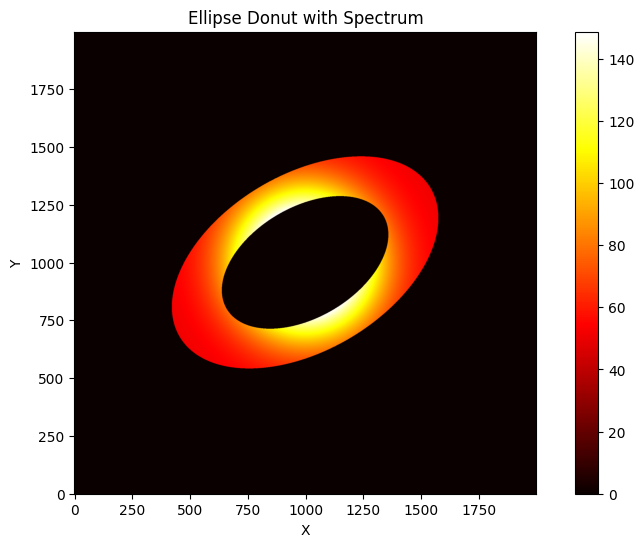

In [10]:
plt.figure(figsize=(10, 6))
plt.imshow(draw_donut_ellipse_bb, cmap='hot', origin='lower')
plt.title('Ellipse Donut with Spectrum')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [11]:
filename = 'donut_ellipse.fits'
hdu = fits.PrimaryHDU(draw_donut_ellipse_bb)
hdu.writeto(filename, overwrite=True)

In [12]:
from scopesim.source import source_templates as sim_tp

In [13]:
src_star = sim_tp.star(flux=10*u.ABmag)

In [14]:
import os
import datetime
 
import shutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS

import scopesim as sim
import scopesim_templates as sim_tp

In [15]:
hdul = fits.open('donut_ellipse.fits') #Donut
hdul[0].header["CDELT1"] = (0.0057 / 3600) / 10  #CD1_1 
hdul[0].header["CDELT2"] = (0.0057 / 3600) / 10  #CD2_2 #für metis 0.0057 / 3600
hdul[0].header["CRVAL1"] = 0
hdul[0].header["CRVAL2"] = 0
hdul[0].header["CRPIX1"] = 1000.5 #(Naxis +1) /2
hdul[0].header["CRPIX2"] = 1000.5
hdul[0].header["CUNIT1"] = "deg"
hdul[0].header["CUNIT2"] = "deg"

#hdul[0].data -= 0.9 * np.median(hdul[0].data)
src_disk = sim.Source(image_hdu=hdul[0], flux=1e-6*u.Jy)

In [16]:
src = src_star + src_disk

<Axes: xlabel='x [arcsec]', ylabel='y [arcsec]'>

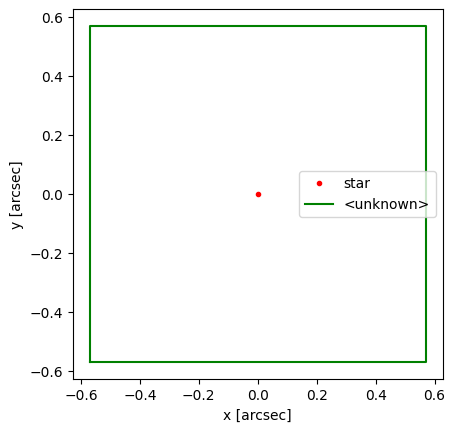

In [17]:
src.plot()

In [18]:
cmd_l = sim.UserCommands(use_instrument='METIS', set_modes=['img_lm'], 
                        properties={"!OBS.exptime": 3600})
metis = sim.OpticalTrain(cmd_l)
metis['skycalc_atmosphere'].include=False
metis['detector_linearity'].include=False

In [19]:
metis.observe(src)
hdus = metis.readout()

astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s
astar.scopesim.detector.detector_manager - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Applying gain 4.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s


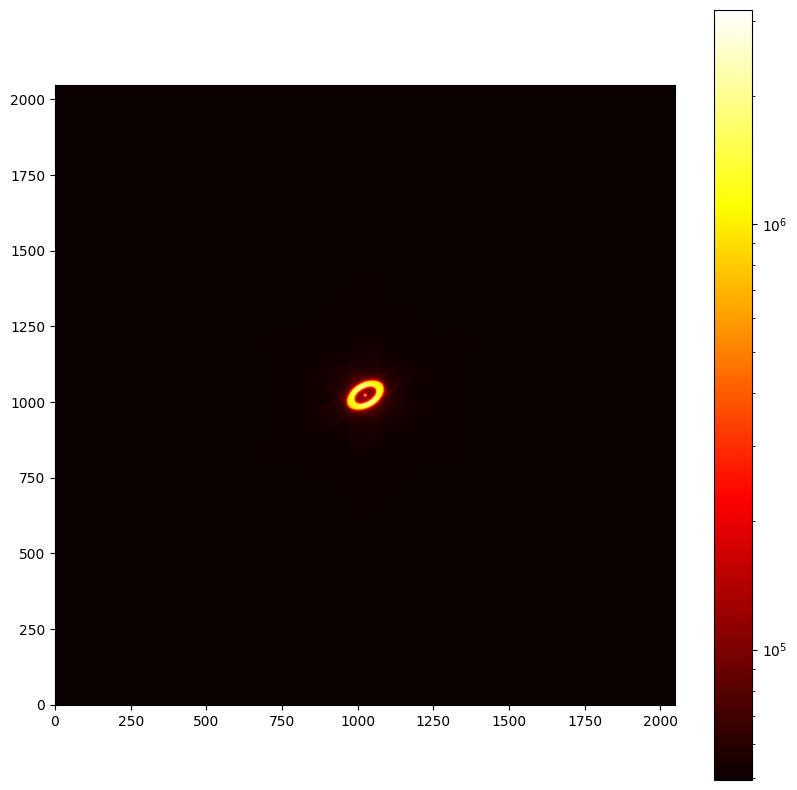

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(hdus[0][1].data, norm=LogNorm(), origin='lower', cmap='hot')
plt.colorbar()

In [21]:
cmd_n = sim.UserCommands(use_instrument='METIS', set_modes=['img_n'], 
                        properties={"!OBS.exptime": 3600})
metis_n = sim.OpticalTrain(cmd_n)
metis_n['skycalc_atmosphere'].include=False
metis_n['detector_linearity'].include=False
metis_n['chop_nod'].include=False
metis_n['detector_readout_parameters'].include=False

In [22]:
metis_n.effects

element,name,class,included
str23,str27,str28,bool
armazones,skycalc_atmosphere,SkycalcTERCurve,False
ELT,telescope_reflection,SurfaceList,True
ELT,telescope_fits_keywords,ExtraFitsKeywords,True
METIS,common_fore_optics,SurfaceList,True
METIS,adc_wheel : [False],ADCWheel,False
METIS,slit_wheel : [False],SlitWheel,False
METIS,cold_stop,PupilTransmission,True
METIS,common_fits_keywords,ExtraFitsKeywords,True
METIS,cfo_fits_keywords,ExtraFitsKeywords,True


In [23]:
metis_n.observe(src)
hdus_n = metis_n.readout()

 FOVs:   0%|          | 0/3 [00:00<?, ?it/s]

astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s
astar.scopesim.detector.detector_manager - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Applying gain 201
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s


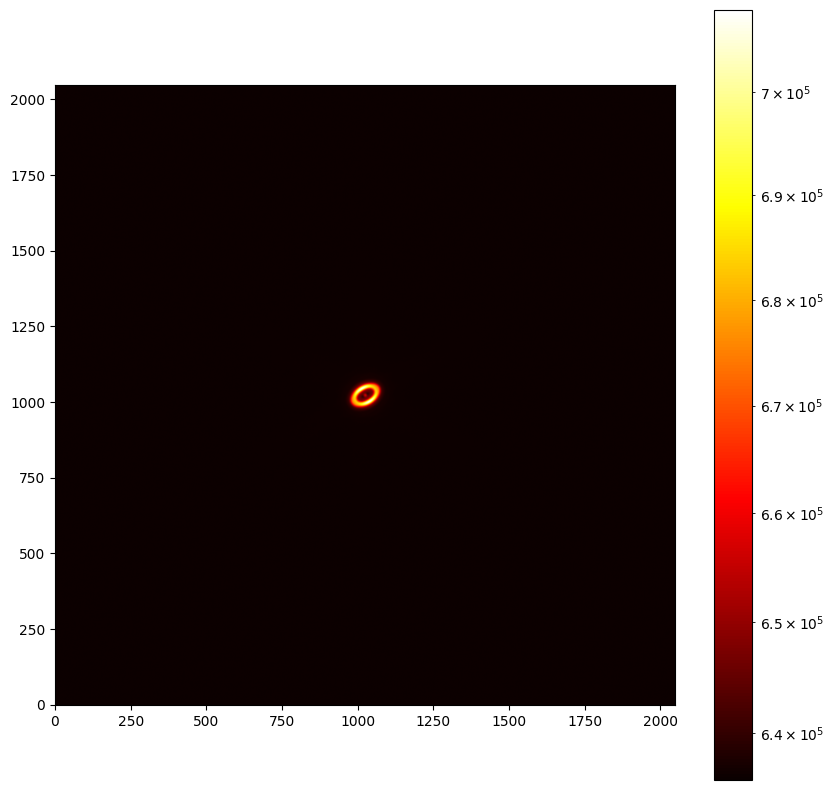

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_n[0][1].data, norm=LogNorm(), origin='lower', cmap='hot')
plt.colorbar()

In [25]:
cmd_n_chop = sim.UserCommands(use_instrument='METIS', set_modes=['img_n'], 
                        properties={"!OBS.exptime": 3600})
metis_n_chop = sim.OpticalTrain(cmd_n_chop)
metis_n_chop['skycalc_atmosphere'].include=False
metis_n_chop['detector_linearity'].include=False
metis_n_chop['chop_nod'].include=True
metis_n_chop['detector_readout_parameters'].include=False

In [26]:
metis_n_chop.observe(src)
hdus_n_chop = metis_n_chop.readout()

 FOVs:   0%|          | 0/3 [00:00<?, ?it/s]

astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s
astar.scopesim.detector.detector_manager - Extracting from 1 detectors...
astar.scopesim.effects.electronic - Applying gain 201
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Exposure parameters: DIT = 1.000 s, NDIT = 1
astar.scopesim.effects.electronic - Total exposure time: 1.000 s


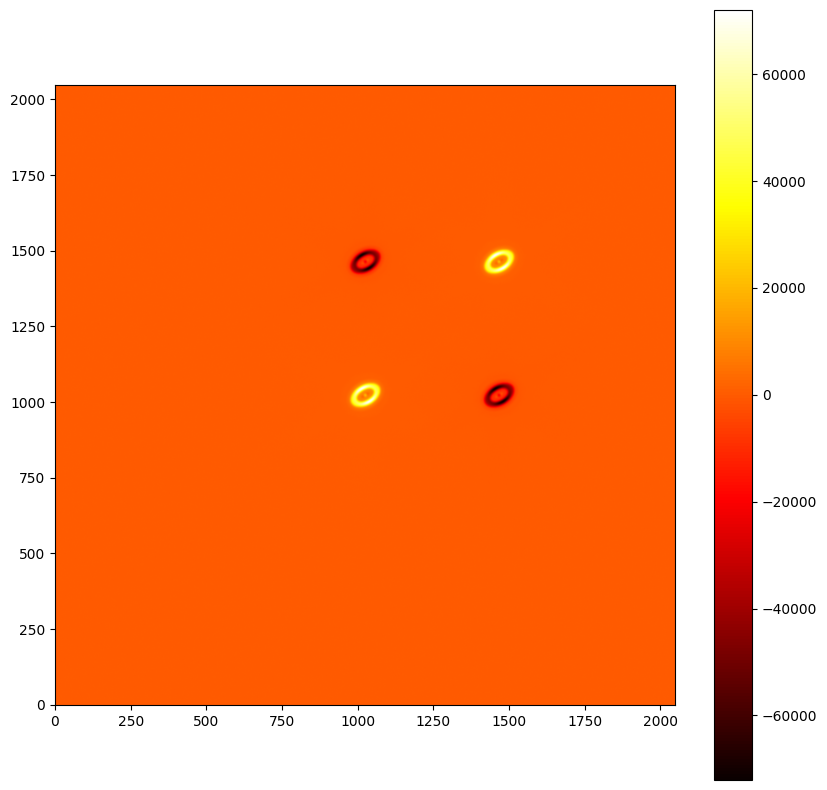

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(hdus_n_chop[0][1].data, origin='lower', cmap='hot')
plt.colorbar()

In [28]:
cmd_lms = sim.UserCommands(
    use_instrument="METIS",
    set_modes=['lms'],
    properties={
        "!OBS.wavelen": 3.555,

        # These !SIM.spectral_* properties make the simulation faster, but less precise.
        # Comment them out for your final simulations.
        #"!SIM.spectral_bin_width": 1e-3,
        #"!SIM.spectral_resolution": 1000,
       
    })

metis_lms = sim.OpticalTrain(cmd_lms)
metis_lms['skycalc_atmosphere'].include=False

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/metis_lms_trace_list.py:409: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  thematrix[i, j] = (subpoly["P3"][sel_ij] * angle**3 +

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/metis_lms_trace_list.py:291: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release. The functionality should be moved somewhere else.
  self.meta["fov"] = self.fov_grid()

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/spectral_trace_list.py:163: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release. The functionality should be moved somewhere else.
  fov = 

In [29]:
metis_lms.effects

element,name,class,included
str24,str27,str25,bool
armazones,skycalc_atmosphere,SkycalcTERCurve,False
ELT,telescope_reflection,SurfaceList,True
ELT,telescope_fits_keywords,ExtraFitsKeywords,True
METIS,common_fore_optics,SurfaceList,True
METIS,adc_wheel : [False],ADCWheel,False
METIS,slit_wheel : [False],SlitWheel,False
METIS,cold_stop,PupilTransmission,True
METIS,common_fits_keywords,ExtraFitsKeywords,True
METIS,cfo_fits_keywords,ExtraFitsKeywords,True


In [30]:
metis_lms.observe(src)

py.warnings - WARNING: /root/miniconda3/envs/scopesim/lib/python3.10/site-packages/scopesim/effects/metis_lms_trace_list.py:76: DeprecationWarning: The fov_grid method is deprecated and will be removed in a future release. The functionality should be moved somewhere else.
  volumes = [spectral_trace.fov_grid()



 FOV effects:   0%|          | 0/2 [00:00<?, ?it/s]

astar.scopesim.effects.psfs - Interpolating PSF onto (5516, 143, 219) cube


 PSF slices:   0%|          | 0/5516 [00:00<?, ?it/s]

 Spectral Traces:   0%|          | 0/28 [00:00<?, ?it/s]

astar.scopesim.optics.image_plane - No BUNIT found in added HDU.


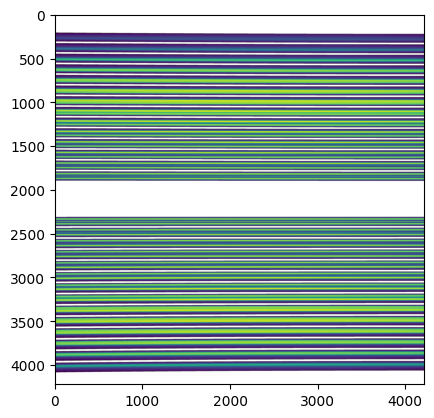

In [31]:
ip = metis_lms.image_planes[0]

plt.imshow(ip.data, norm=LogNorm())

In [32]:
hdul_lms = metis_lms.readout(exptime=3600.)[0]

astar.scopesim.effects.electronic - Requested exposure time: 3600.000 s
astar.scopesim.effects.electronic - Required DIT without saturation: 79.597 s
astar.scopesim.effects.electronic - Exposure parameters: DIT = 78.261 s, NDIT = 46
astar.scopesim.effects.electronic - Total exposure time: 3600.000 s
astar.scopesim.detector.detector_manager - Extracting from 4 detectors...
astar.scopesim.effects.electronic - Applying gain [1] mapping contents:
├─1: 2.0
├─2: 2.0
├─3: 2.0
└─4: 2.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Applying gain [1] mapping contents:
├─1: 2.0
├─2: 2.0
├─3: 2.0
└─4: 2.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Applying gain [1] mapping contents:
├─1: 2.0
├─2: 2.0
├─3: 2.0
└─4: 2.0
astar.scopesim.effects.electronic - Applying digitization to dtype float32.
astar.scopesim.effects.electronic - Applying gain [1] mapping contents:
├

In [33]:
len(hdul_lms)

5

In [34]:
data_raw = hdul_lms[1].data

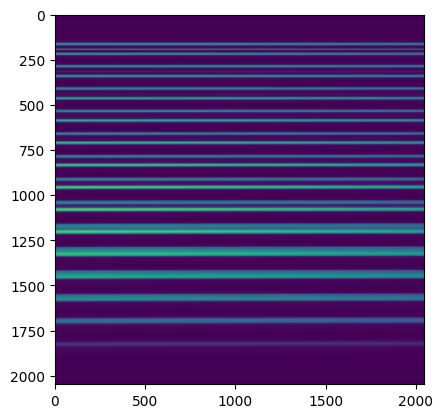

In [35]:
plt.imshow(data_raw)

In [36]:
rectified = metis_lms["lms_spectral_traces"].rectify_cube(hdul_lms)

astar.scopesim.effects.metis_lms_trace_list - Computing interpolation functions
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 1
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 2
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 3
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 4
astar.scopesim.effects.spectral_trace_list_utils -    3.53 .. 3.58 um
astar.scopesim.effects.spectral_trace_list_utils -    Bin width 1e-05 um
astar.scopesim.effects.spectral_trace_list_utils - Rectifying Slice 

In [37]:
rectified.data.shape

(5517, 28, 110)

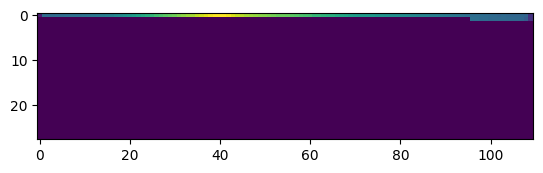

In [38]:
plt.imshow(rectified.data[3,:,:])

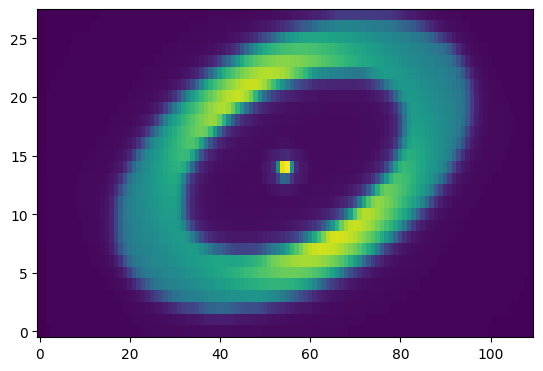

In [39]:
plt.imshow(rectified.data.sum(axis=0), aspect=2.6, origin='lower')